# Which tree species should the city plant?

## 📖 Background
You work for a nonprofit organization advising the planning department on ways to improve the quantity and quality of trees in New York City. The urban design team believes tree size (using trunk diameter as a proxy for size) and health are the most desirable characteristics of city trees.

The city would like to learn more about which tree species are the best choice to plant on the streets of Manhattan.

![my Image caption](1.jpeg)

## 💾 The data
The team has provided access to the 2015 tree census and geographical information on New York City neighborhoods ([trees](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), [neighborhoods](https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz)):

#### Tree Census
- "tree_id" - Unique id of each tree.
- "tree_dbh" - The diameter of the tree in inches measured at 54 inches above the ground.
- "curb_loc" - Location of the tree bed in relation to the curb. Either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).
- "spc_common" - Common name for the species.
- "status" - Indicates whether the tree is alive or standing dead.
- "health" - Indication of the tree's health (Good, Fair, and Poor).
- "root_stone" - Indicates the presence of a root problem caused by paving stones in the tree bed.
- "root_grate" - Indicates the presence of a root problem caused by metal grates in the tree bed.
- "root_other" - Indicates the presence of other root problems.
- "trunk_wire" - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk.
- "trnk_light" - Indicates the presence of a trunk problem caused by lighting installed on the tree.
- "trnk_other" - Indicates the presence of other trunk problems.
- "brch_light" - Indicates the presence of a branch problem caused by lights or wires in the branches.
- "brch_shoe" - Indicates the presence of a branch problem caused by shoes in the branches.
- "brch_other" - Indicates the presence of other branch problems.
- "postcode" - Five-digit zip code where the tree is located.
- "nta" - Neighborhood Tabulation Area (NTA) code from the 2010 US Census for the tree.
- "nta_name" - Neighborhood name.
- "latitude" - Latitude of the tree, in decimal degrees.
- "longitude" - Longitude of the tree, in decimal degrees.

#### Neighborhoods' geographical information
- "ntacode" - NTA code (matches Tree Census information).
- "ntaname" - Neighborhood name (matches Tree Census information).
- "geometry" - Polygon that defines the neighborhood.

_Tree census and neighborhood information from the City of New York [NYC Open Data](https://opendata.cityofnewyork.us/data/)._

### The work was done in the Data camp workspace, but when it was published, I was forced to switch to another workspace because there was a problem with displaying maps that I had not defeated

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from PIL import Image


sns.set()

trees = pd.read_csv('data/trees.csv')
trees

tree_id  tree_dbh  ...   latitude  longitude
0       190422        11  ...  40.770046 -73.984950
1       190426        11  ...  40.770210 -73.985338
2       208649         9  ...  40.762724 -73.987297
3       193310        14  ...  40.772171 -73.960456
4       199760         4  ...  40.782087 -73.980964
...        ...       ...  ...        ...        ...
64224   208765        11  ...  40.763224 -73.960984
64225   170513         9  ...  40.707884 -74.017598
64226   190040        10  ...  40.786150 -73.971152
64227   191269        12  ...  40.739270 -73.983960
64228   192812         5  ...  40.739913 -74.004892

[64229 rows x 20 columns]

In [2]:
neighborhoods = gpd.read_file('data/nta.shp')
neighborhoods

borocode  ...                                           geometry
0         3.0  ...  POLYGON ((-73.94733 40.62917, -73.94687 40.626...
1         3.0  ...  POLYGON ((-73.94193 40.70073, -73.94439 40.700...
2         2.0  ...  POLYGON ((-73.89138 40.86170, -73.89106 40.861...
3         3.0  ...  POLYGON ((-73.97605 40.63128, -73.97717 40.630...
4         3.0  ...  POLYGON ((-73.90856 40.65210, -73.90945 40.651...
..        ...  ...                                                ...
190       2.0  ...  POLYGON ((-73.91192 40.84326, -73.91194 40.843...
191       4.0  ...  POLYGON ((-73.83103 40.71434, -73.83115 40.714...
192       4.0  ...  MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ...
193       4.0  ...  POLYGON ((-73.75763 40.66645, -73.75756 40.666...
194       4.0  ...  MULTIPOLYGON (((-73.74712 40.63716, -73.74707 ...

[195 rows x 8 columns]

In [3]:
neighborhoods.drop_duplicates()
trees.drop_duplicates()

tree_id  tree_dbh  ...   latitude  longitude
0       190422        11  ...  40.770046 -73.984950
1       190426        11  ...  40.770210 -73.985338
2       208649         9  ...  40.762724 -73.987297
3       193310        14  ...  40.772171 -73.960456
4       199760         4  ...  40.782087 -73.980964
...        ...       ...  ...        ...        ...
64224   208765        11  ...  40.763224 -73.960984
64225   170513         9  ...  40.707884 -74.017598
64226   190040        10  ...  40.786150 -73.971152
64227   191269        12  ...  40.739270 -73.983960
64228   192812         5  ...  40.739913 -74.004892

[64229 rows x 20 columns]

In [4]:
def unique_value(df):
	variables = pd.DataFrame(columns=['Variable','Number of unique values','Type data', 'Values'])
	for i, var in enumerate(df.columns):
		variables.loc[i] = [var, df[var].nunique(),df.dtypes[i] ,df[var].unique().tolist()]
	variables.set_index('Variable', inplace=True)
	return variables

In [5]:
unique_value(trees)


Number of unique values  ...                                             Values
Variable                             ...                                                   
tree_id                       64229  ...  [190422, 190426, 208649, 193310, 199760, 20155...
tree_dbh                         58  ...  [11, 9, 14, 4, 7, 5, 12, 13, 20, 6, 8, 18, 2, ...
curb_loc                          2  ...                           [OnCurb, OffsetFromCurb]
spc_common                      128  ...  [honeylocust, American linden, willow oak, Lon...
status                            2  ...                                      [Alive, Dead]
health                            3  ...                            [Good, Fair, nan, Poor]
root_stone                        2  ...                                          [No, Yes]
root_grate                        2  ...                                          [No, Yes]
root_other                        2  ...                                          [No, Yes]
trunk_wire                        2  ...                                          [No, Yes]
trnk_light                        2  ...                                          [No, Yes]
trnk_other                        2  ...                                          [No, Yes]
brch_light                        2  ...                                          [No, Yes]
brch_shoe                         2  ...                                          [No, Yes]
brch_other                        2  ...                                          [No, Yes]
postcode                         49  ...  [10023, 10019, 10021, 10024, 10002, 10009, 100...
nta                              28  ...  [MN14, MN15, MN40, MN12, MN27, MN50, MN24, MN2...
nta_name                         28  ...  [Lincoln Square, Clinton, Upper East Side-Carn...
latitude                      64034  ...  [40.77004563, 40.77020969, 40.76272385, 40.772...
longitude                     63930  ...  [-73.98494997, -73.98533807, -73.98729652, -73...

[20 rows x 3 columns]

In [6]:
unique_value(neighborhoods)

Number of unique values  ...                                             Values
Variable                             ...                                                   
borocode                          5  ...                          [3.0, 2.0, 4.0, 1.0, 5.0]
boroname                          5  ...  [Brooklyn, Bronx, Queens, Manhattan, Staten Is...
countyfips                        5  ...                          [047, 005, 081, 061, 085]
ntacode                         195  ...  [BK43, BK75, BX40, BK88, BK96, QN52, QN53, BK4...
ntaname                         195  ...  [Midwood, Bedford, Fordham South, Borough Park...
shape_area                      195  ...  [35799637.8103, 32629833.1149, 6307283.62202, ...
shape_leng                      195  ...  [27996.5912736, 29992.9191744, 15878.2729212, ...
geometry                        195  ...  [POLYGON ((-73.94732672160586 40.6291665672094...

[8 rows x 3 columns]

In [7]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(20, 16), title='% of NaN (from {} lines)'.format(len(df)), 
                               color='#86bf91', legend=False, fontsize=17)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, .10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold

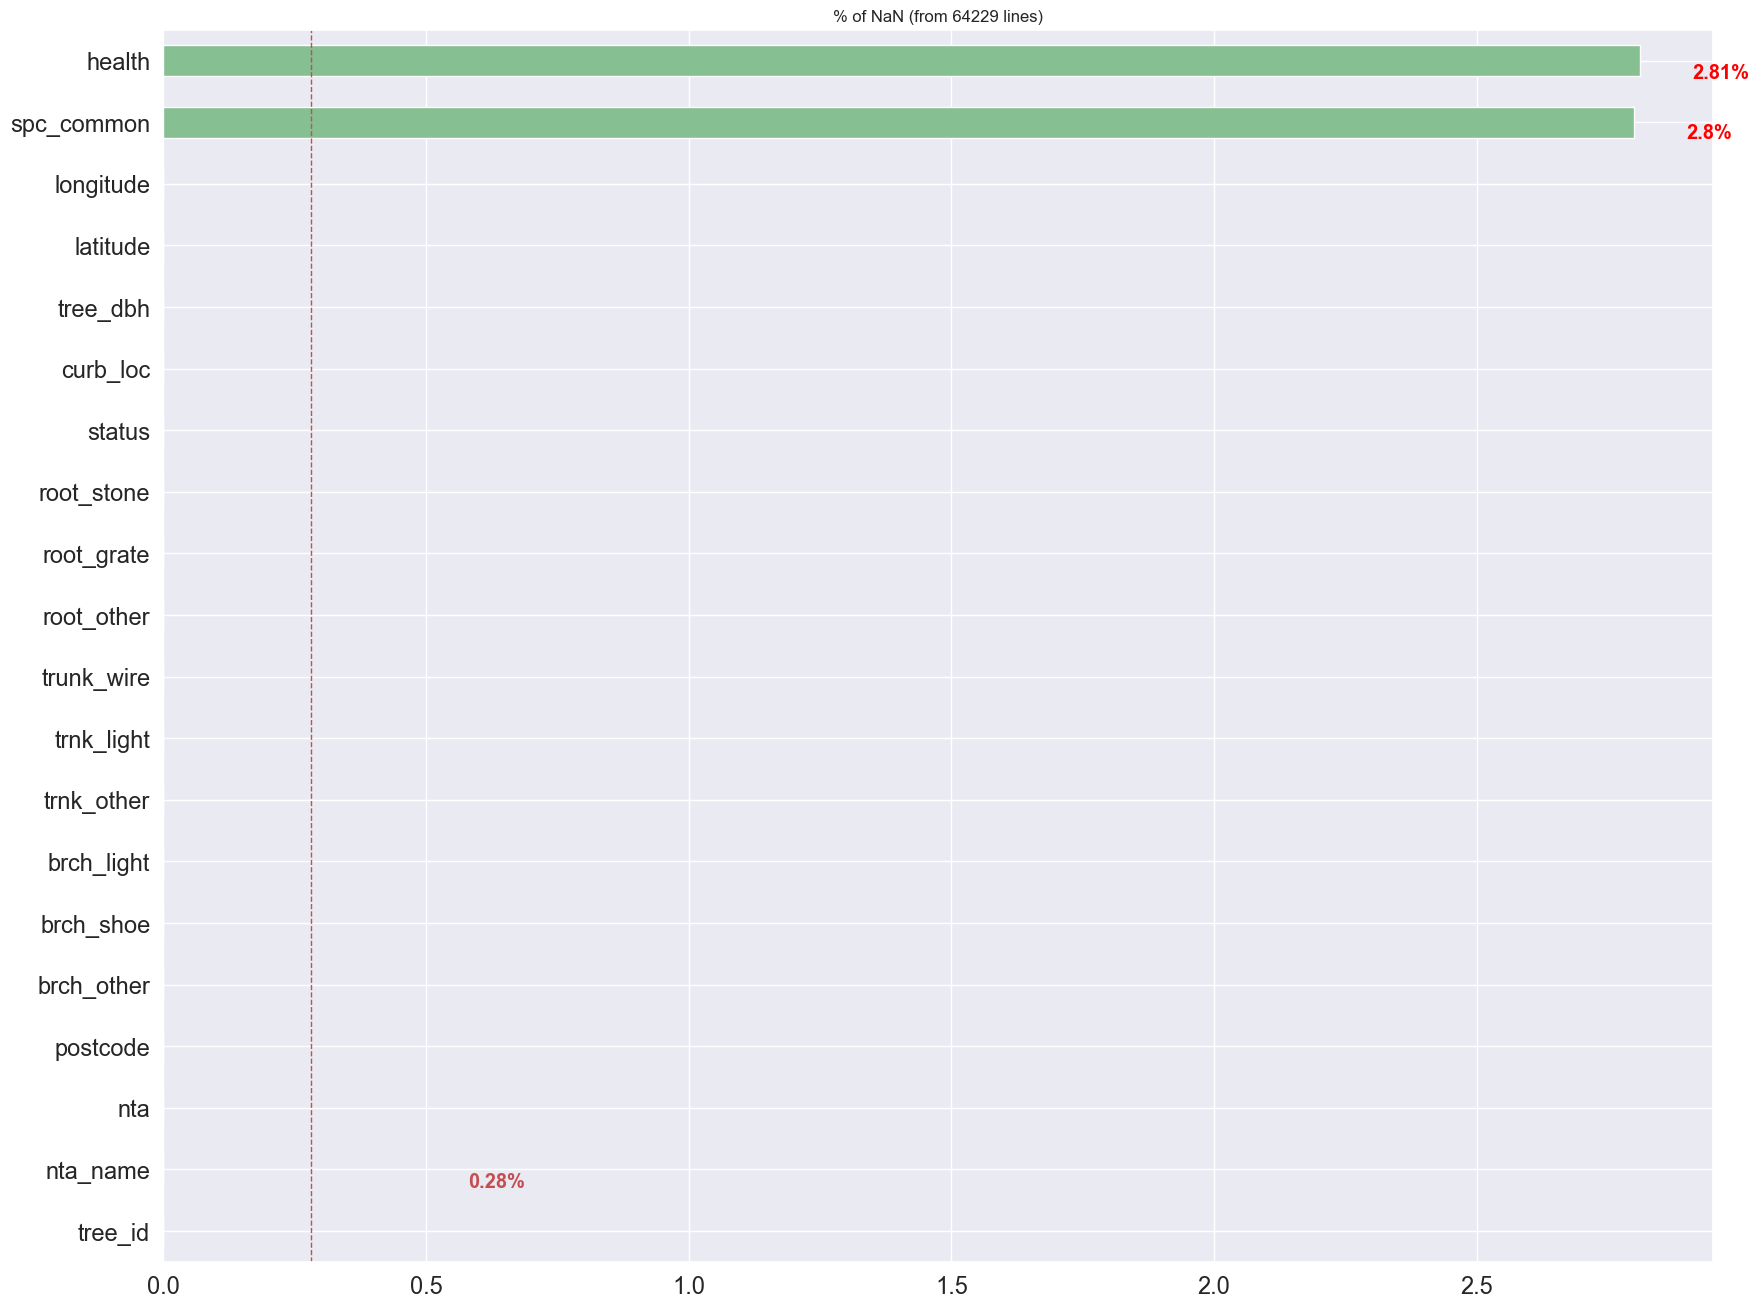

In [8]:
plot, threshold = percent_hbar(trees)


### Let's take a closer look at our missing data.

In [9]:
trees[trees['health'].isna()==True]

tree_id  tree_dbh  ...   latitude  longitude
79      188609         9  ...  40.771992 -73.951657
106     189412         7  ...  40.807979 -73.959649
169     173517         8  ...  40.735202 -74.005829
173     200440         3  ...  40.712705 -73.997585
225     195980         3  ...  40.745469 -73.985202
...        ...       ...  ...        ...        ...
63941   175093         3  ...  40.715980 -73.996222
63980   194257         2  ...  40.720428 -73.982375
63981   192618         2  ...  40.717588 -73.991245
63983   196070         0  ...  40.762000 -73.989176
64210   156162         3  ...  40.785136 -73.951109

[1802 rows x 20 columns]

In [10]:
print('Alive trees in Manhatten {}\nDead trees in Manhatten {}'.format(trees.status.value_counts()[0],trees.status.value_counts()[1]))

Alive trees in Manhatten 62427
Dead trees in Manhatten 1802
Alive trees in Manhatten 62427
Dead trees in Manhatten 1802


## As we saw that all the missing values are data about dead trees, and then we will try to figure out what happened to them and perhaps understand how to avoid this in the future

In [11]:
dead_tree = trees[trees['status']=="Dead"]
trees =trees[trees['status']!="Dead"]
dead_tree

tree_id  tree_dbh  ...   latitude  longitude
79      188609         9  ...  40.771992 -73.951657
106     189412         7  ...  40.807979 -73.959649
169     173517         8  ...  40.735202 -74.005829
173     200440         3  ...  40.712705 -73.997585
225     195980         3  ...  40.745469 -73.985202
...        ...       ...  ...        ...        ...
63941   175093         3  ...  40.715980 -73.996222
63980   194257         2  ...  40.720428 -73.982375
63981   192618         2  ...  40.717588 -73.991245
63983   196070         0  ...  40.762000 -73.989176
64210   156162         3  ...  40.785136 -73.951109

[1802 rows x 20 columns]

In [12]:
print('Location of the tree bed in relation to the curb\n{}\nPercentage of trees relatively out of planting \n{}%\n{}%' .format(dead_tree.curb_loc.value_counts(),(100*dead_tree.curb_loc.value_counts()[0]/dead_tree.curb_loc.count()).round(1),(100*dead_tree.curb_loc.value_counts()[1]/dead_tree.curb_loc.count()).round(1)))


Location of the tree bed in relation to the curb
OnCurb            1722
OffsetFromCurb      80
Name: curb_loc, dtype: int64
Percentage of trees relatively out of planting 
95.6%
4.4%
Location of the tree bed in relation to the curb
OnCurb            1722
OffsetFromCurb      80
Name: curb_loc, dtype: int64
Percentage of trees relatively out of planting 
95.6%
4.4%


According to the data, we have only 2.8% of dead trees, unfortunately we do not know what kind of trees they were in order to understand which trees maybe we should abandon or reconsider caring for them.
### This subarray has only two columns that can tell us something about these trees:
- "tree_dbh" - The diameter of the tree in inches measured at 54 inches above the ground.
- "nta_name" - Neighborhood name.



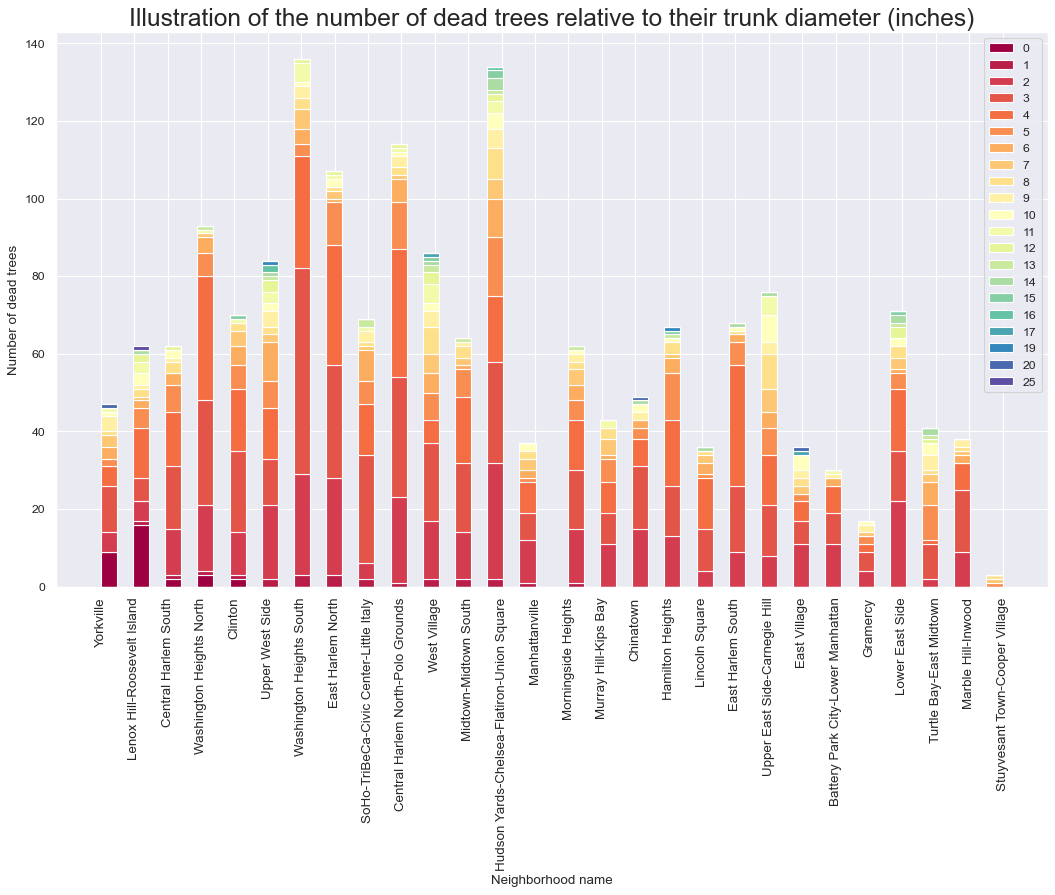

In [13]:
df_agg = dead_tree.loc[:, ['nta_name', 'tree_dbh']].groupby('tree_dbh')
vals = [dead_tree['nta_name'].values.tolist() for i, dead_tree in df_agg]

plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 56, stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(dead_tree['tree_dbh']).tolist(), colors[:len(vals)])})
plt.title('Illustration of the number of dead trees relative to their trunk diameter (inches)', fontsize=22)
plt.xlabel( 'Neighborhood name')
plt.ylabel("Number of dead trees")
plt.xticks(rotation=90, fontsize=12);

plt.show()

#### As we can see, mostly trees with a small trunk diameter (up to 5 inches) predominate among the dead trees. Unfortunately, we do not have additional information to better understand why they did not take root at their landing site and there are no statistics in which year they were planted.

## Let's look at the map of Manhattan where the dead trees were planted

In [14]:
dead = folium.Map(location=[40.7834, -73.9662 ], tiles="OpenStreetMap", zoom_start=12)

for i in range(0,len(dead_tree)):
   folium.Marker(
      location=[dead_tree.iloc[i]['latitude'], dead_tree.iloc[i]['longitude']],
      popup=dead_tree.iloc[i]['tree_id'],
   ).add_to(dead)
#dead.save("dead_trees_map.html")
dead

## Below I will attach a screenshot of the interactive map (an error occurs in the data camp editor when displaying it, but if you switch to Jupyterlab) you can enjoy all the delights of the interactive map and see where each dead tree is located.

![my Image caption](map.jpeg)

### I did not find any regularity in the data of the dead trees, except that there are no dead trees in parks, squares and any small islands of "green spaces". There must be an explanation for this: perhaps other services take care of the parks and carefully look after their "wards", perhaps the existence of a curb near its roots and the presence of buildings affect the life of the tree (since trees most likely need to be constantly pruned).

In [15]:
dead_ = folium.Map([40.7834, -73.9662], 
               zoom_start=12, 
               tiles="CartoDb dark_matter")
l_loc = zip(dead_tree.latitude, dead_tree.longitude)

for location in l_loc:
    folium.CircleMarker(location=location, 
        color = '#cc0000',radius=2,      fill=True,).add_to(dead_)
#dead_.save("dead.html")
dead_

In [16]:
life = folium.Map([40.7834, -73.9662], 
               zoom_start=12, 
               tiles="CartoDb dark_matter")
l_loc = zip(trees.latitude, trees.longitude)

for location in l_loc:
    folium.CircleMarker(location=location, 
        color = '#178000',  radius=1,).add_to(life)
#life.save("life.html")
#life

## In case the maps with marked trees do not load, I have attached pictures of these maps, where both dead and living trees are marked.

In [17]:
# gluing multiple images
#img_01 = Image.open("Dead_trees.jpeg")
#img_02 = Image.open("LIfe_trees.jpeg")
#img_01_size = img_01.size
#img_02_size = img_02.size
#new_im = Image.new('RGB', (2*img_01_size[0],img_01_size[1]), (250,250,250))
#new_im.paste(img_01, (0,0))
#new_im.paste(img_02, (img_01_size[0],0))
#new_im.save("merged_images.png", "PNG")




![alt](merged_images.png)

### One of our assumptions is confirmed that the territory in parks and squares is controlled by another agency because neither living nor dead trees are marked on the map in these territories.

### I repeat once again that we have "reached a dead end" with the analysis of dead trees and without uploading additional information, we cannot explain the cause of their death, so we make a decision and move on. Let's start answering the questions and see what life is like for living trees in Manhattan

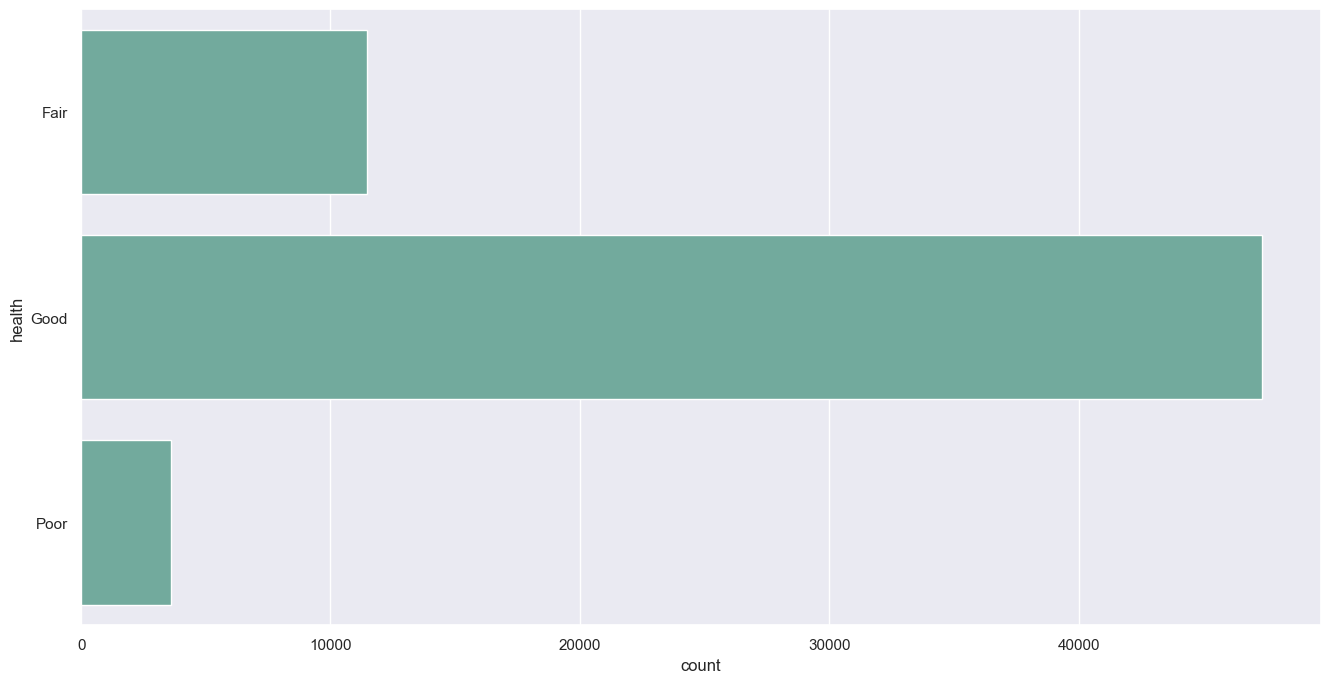

In [18]:
tree_count = trees.groupby('health').count().rename(columns={'tree_id':'count','tree_dbh':'percentage_of_the_total'})[['count','percentage_of_the_total']]
tree_count.percentage_of_the_total = (100*tree_count.percentage_of_the_total/sum(tree_count.percentage_of_the_total)).round(1)
tree_count = tree_count.reset_index()
plt.figure(figsize=(16, 8))

sns.barplot(data=tree_count, x = 'count',y='health',color='#69b3a2');


So we come to the first question. 
# 1. What are the most common tree species in Manhattan?
After we answer it, we will see "What about the health of these trees?"

In [19]:
mostly_popular_trees = trees.groupby('spc_common').count().sort_values('tree_id',ascending= False).reset_index().rename(columns={'tree_id':'count','tree_dbh':'percentage_of_the_total'})[['spc_common','count','percentage_of_the_total']]
mostly_popular_trees.percentage_of_the_total = (100*mostly_popular_trees.percentage_of_the_total/sum(mostly_popular_trees.percentage_of_the_total)).round(1)
mostly_popular_trees

spc_common  count  percentage_of_the_total
0           honeylocust  13175                     21.1
1          Callery pear   7297                     11.7
2                ginkgo   5859                      9.4
3               pin oak   4584                      7.3
4               Sophora   4453                      7.1
..                  ...    ...                      ...
123      pignut hickory      1                      0.0
124            red pine      1                      0.0
125  red horse chestnut      1                      0.0
126    Persian ironwood      1                      0.0
127          white pine      1                      0.0

[128 rows x 3 columns]

In [20]:
def barplot_best_10(df,X,Y,xlabel,ylabel,N,k,title):
    df=df.sort_values(Y,ascending= True)
   
    n = list(df[X])
    s = list(df[Y].astype(int))
    plt.figure(figsize=(16, 8))
    plt.xticks(rotation=75, fontsize=12);
    ax = plt.bar(n,s)
    plt.title(title,fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i in range(len(s)):
        plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom',rotation=75)
    for i in range(len(s)-N,len(s)):
        ax.patches[i].set_facecolor('#aa3333')
    plt.show()
    
    return  n[len(n)-k:]

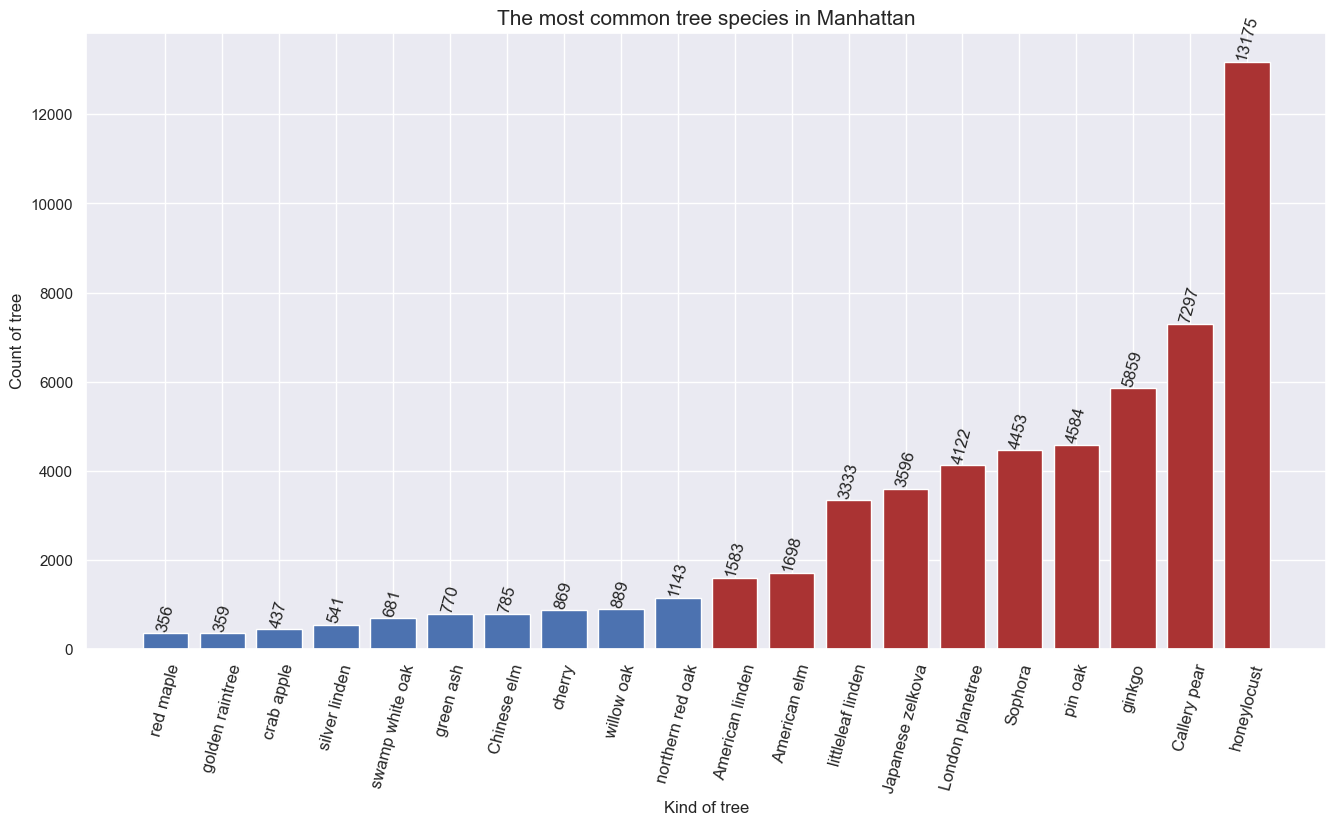

In [21]:
top_10_trees = barplot_best_10(mostly_popular_trees[:20],'spc_common','count','Kind of tree','Count of tree',10,10,'The most common tree species in Manhattan')


## What about the health of these trees ?

In [22]:
df = trees.query("(root_stone == 'Yes' or root_grate =='Yes' or root_other == 'Yes')")
root = folium.Map(location=[40.7834, -73.9662 ], tiles="CartoDb dark_matter", zoom_start=12)

l_loc = zip(df.latitude, df.longitude)

for location in l_loc:
    folium.CircleMarker(location=location, 
        color = '#FFD700',  radius=1,).add_to(root)
#root.save("root_probl.html")
#root



### As we can see, almost a third of all trees have some kind of root problems. But there is one interesting area on the map where there are almost no trees with these problems and few dead trees. And in the area of 7th Avenue there are not many trees at all, according to our data, in the future it would be interesting to consider what the reason for this is.

![my Image caption](root.jpeg)

We have deviated from the problems outlined in the work, although we can still try to "achieve" more from our data, but let's return to the second problem of the current task.

# 2. Which are the neighborhoods with the most trees?

In [23]:
df1 = trees.groupby('nta_name').count().reset_index()[['nta_name','tree_id']]
df2 = dead_tree.groupby('nta_name').count().reset_index()[['nta_name','tree_id']]
neigh = pd.merge(df1,df2, on ='nta_name', how = 'inner')\
          .rename(columns = {'tree_id_x':"count_alive",'tree_id_y':'count_dead'})\
          .sort_values('count_alive',ascending= False)
neigh['total'] = neigh.count_alive+neigh.count_dead
neigh['%_dead'] = (100*neigh.count_dead/neigh.total).round(1)

neigh.reset_index(drop=True,inplace=True)
neigh

nta_name  count_alive  ...  total  %_dead
0                              Upper West Side         5723  ...   5807     1.4
1                Upper East Side-Carnegie Hill         4540  ...   4616     1.6
2                                 West Village         3715  ...   3801     2.3
3            Central Harlem North-Polo Grounds         3355  ...   3469     3.3
4   Hudson Yards-Chelsea-Flatiron-Union Square         2797  ...   2931     4.6
5                     Washington Heights South         2788  ...   2924     4.7
6                          Morningside Heights         2642  ...   2704     2.3
7                         Central Harlem South         2581  ...   2643     2.3
8                     Washington Heights North         2519  ...   2612     3.6
9                            East Harlem North         2398  ...   2505     4.3
10                            Hamilton Heights         2296  ...   2363     2.8
11                 Lenox Hill-Roosevelt Island         2215  ...   2277     2.7
12                     Turtle Bay-East Midtown         2185  ...   2226     1.8
13                                   Yorkville         2133  ...   2180     2.2
14      SoHo-TriBeCa-Civic Center-Little Italy         2101  ...   2170     3.2
15                              Lincoln Square         2008  ...   2044     1.8
16                                     Clinton         1884  ...   1954     3.6
17                           East Harlem South         1877  ...   1945     3.5
18                             Lower East Side         1845  ...   1916     3.7
19                        Murray Hill-Kips Bay         1661  ...   1704     2.5
20                                East Village         1506  ...   1542     2.3
21                          Marble Hill-Inwood         1438  ...   1476     2.6
22                                   Chinatown         1408  ...   1457     3.4
23           Battery Park City-Lower Manhattan         1264  ...   1294     2.3
24                                    Gramercy         1125  ...   1142     1.5
25                       Midtown-Midtown South         1120  ...   1184     5.4
26                              Manhattanville          865  ...    902     4.1
27              Stuyvesant Town-Cooper Village          438  ...    441     0.7

[28 rows x 5 columns]

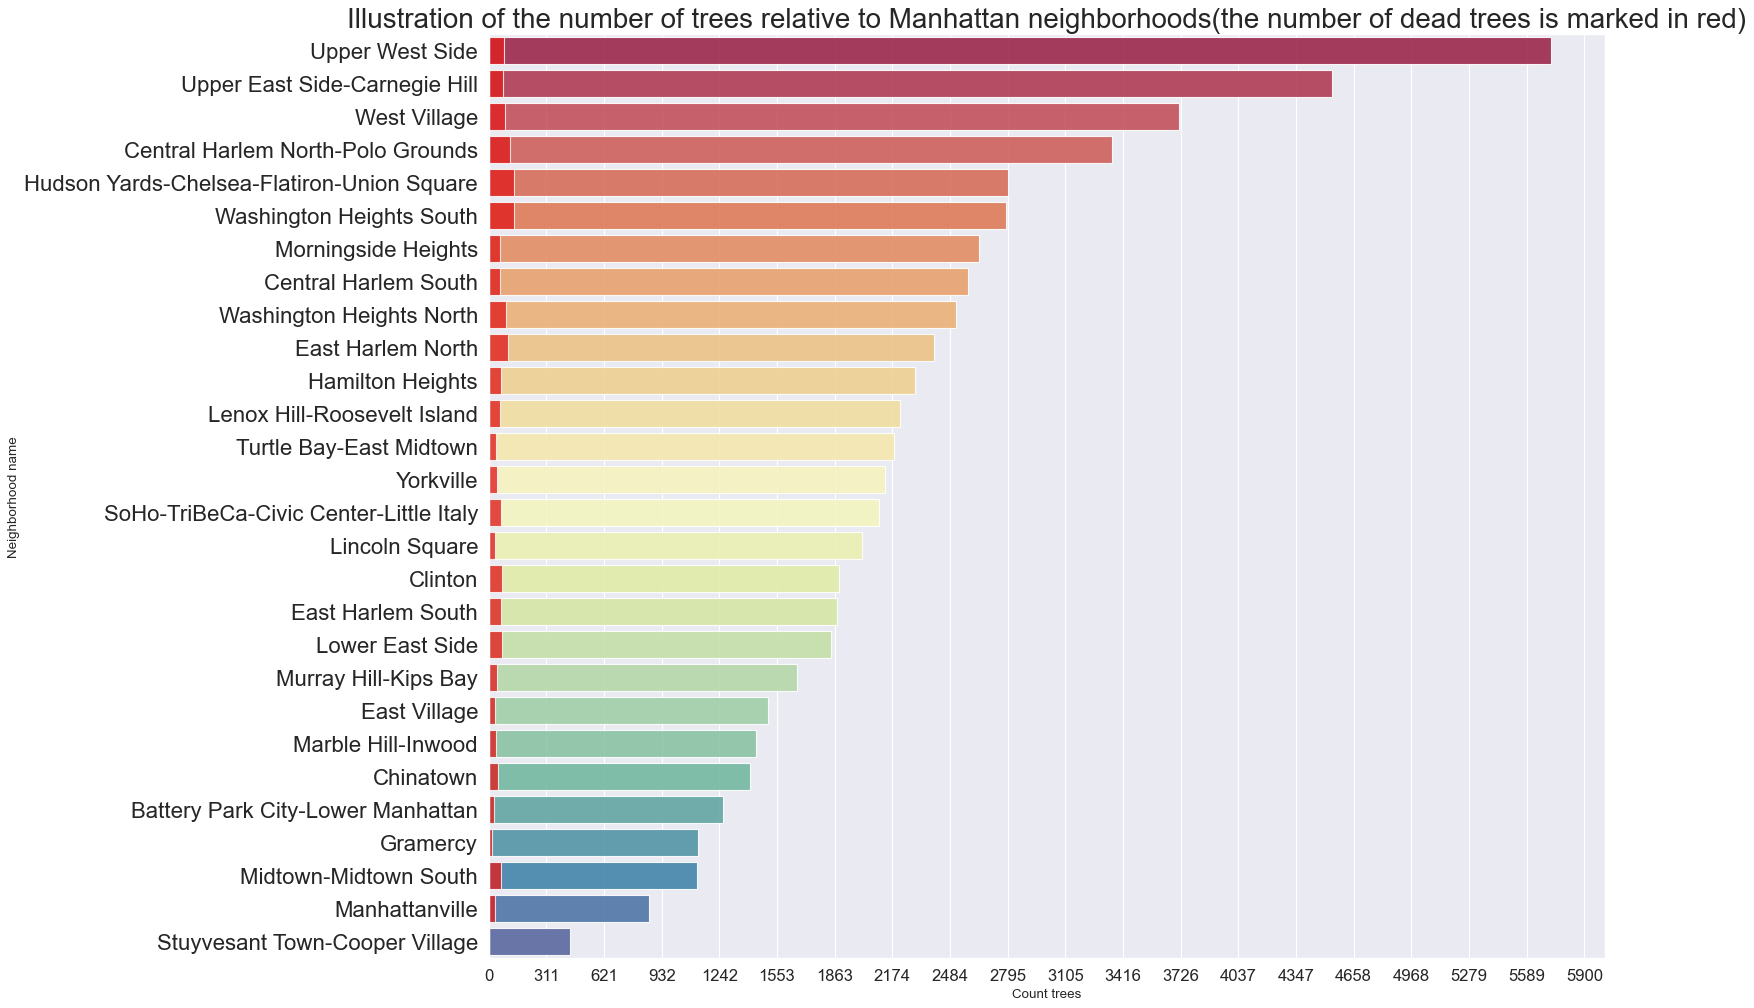

In [24]:
plt.figure(figsize=(18,15), dpi= 80)
sns.set(font_scale = 1); 

sns.barplot (x="count_alive", y="nta_name", data=neigh, alpha = .9,palette='Spectral') 
sns.barplot (x="count_dead", y="nta_name", data=neigh,alpha = .8,color='red' ) ;

plt.title('Illustration of the number of trees relative to Manhattan neighborhoods(the number of dead trees is marked in red)', fontsize=25)
plt.xlabel( 'Count trees')
plt.ylabel("Neighborhood name")
plt.xticks(np.linspace(0, 5900, 20),fontsize=15)
plt.yticks( fontsize=20);

plt.show()


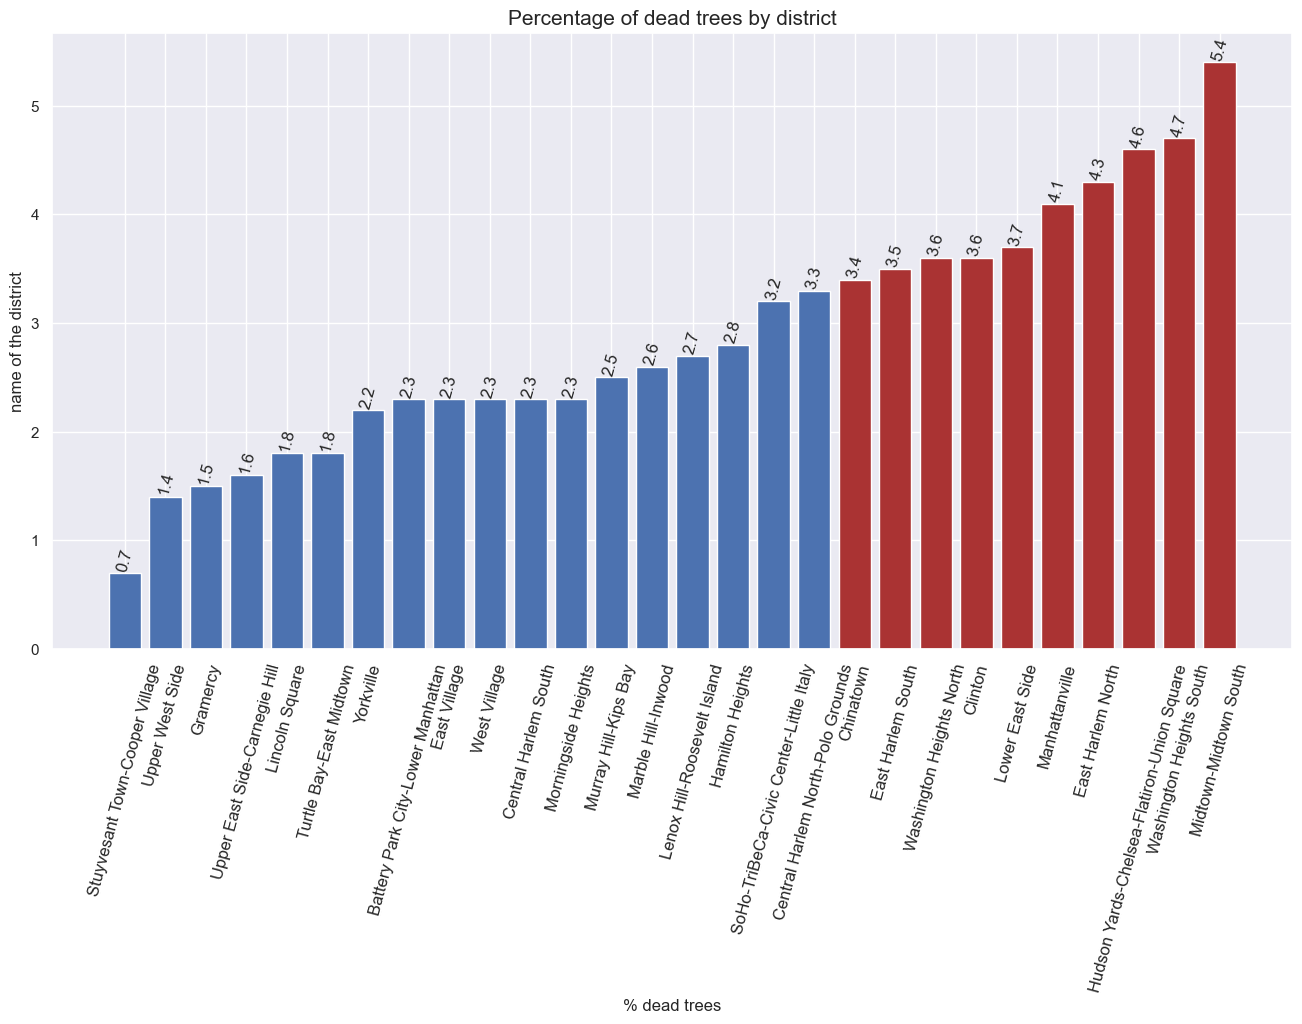

In [25]:
def barplot_best(df,X,Y,xlabel,ylabel,N,k,title):
    df=df.sort_values(Y,ascending= True)
   
    n = list(df[X])
    s = list(df[Y])
    plt.figure(figsize=(16, 8))
    plt.xticks(rotation=75, fontsize=12);
    ax = plt.bar(n,s)
    plt.title(title,fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i in range(len(s)):
        plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom',rotation=75)
    for i in range(len(s)-N,len(s)):
        ax.patches[i].set_facecolor('#aa3333')
    plt.show()
    
    return  n[len(n)-k:]
neigh_list = barplot_best(neigh,'nta_name','%_dead','% dead trees','name of the district',10,15,'Percentage of dead trees by district')


In [26]:
top_10_region = neigh.nta_name[:10].to_list()


### We received a list of the top 10 districts with the largest number of trees (more than half of all living trees), we also returned again to already dead trees, averaging 2.8 percent of dead trees in all districts. It would be interesting to look for reasons why in one area less than 1 percent of dead trees and in another more than 5 percent.

# 3. A visualization of Manhattan's neighborhoods and tree locations.

In [27]:
Manhattan = neighborhoods[neighborhoods['boroname'] == 'Manhattan']
Manhattan.head()

borocode  ...                                           geometry
23       1.0  ...  POLYGON ((-73.98256 40.73135, -73.98247 40.731...
26       1.0  ...  MULTIPOLYGON (((-73.93805 40.78083, -73.93790 ...
27       1.0  ...  POLYGON ((-73.94933 40.78519, -73.94982 40.784...
38       1.0  ...  POLYGON ((-73.95210 40.81144, -73.95259 40.810...
49       1.0  ...  POLYGON ((-73.94608 40.82126, -73.94640 40.820...

[5 rows x 8 columns]

In [28]:
def create_gdf(df, x, y):
    return gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df[y], df[x]),crs={'init':'EPSG:4326'})


In [29]:
gdf = create_gdf(trees,'latitude','longitude')
gdf.head()

tree_id  tree_dbh curb_loc  ...   latitude  longitude                    geometry
0   190422        11   OnCurb  ...  40.770046 -73.984950  POINT (-73.98495 40.77005)
1   190426        11   OnCurb  ...  40.770210 -73.985338  POINT (-73.98534 40.77021)
2   208649         9   OnCurb  ...  40.762724 -73.987297  POINT (-73.98730 40.76272)
3   193310        14   OnCurb  ...  40.772171 -73.960456  POINT (-73.96046 40.77217)
4   199760         4   OnCurb  ...  40.782087 -73.980964  POINT (-73.98096 40.78209)

[5 rows x 21 columns]

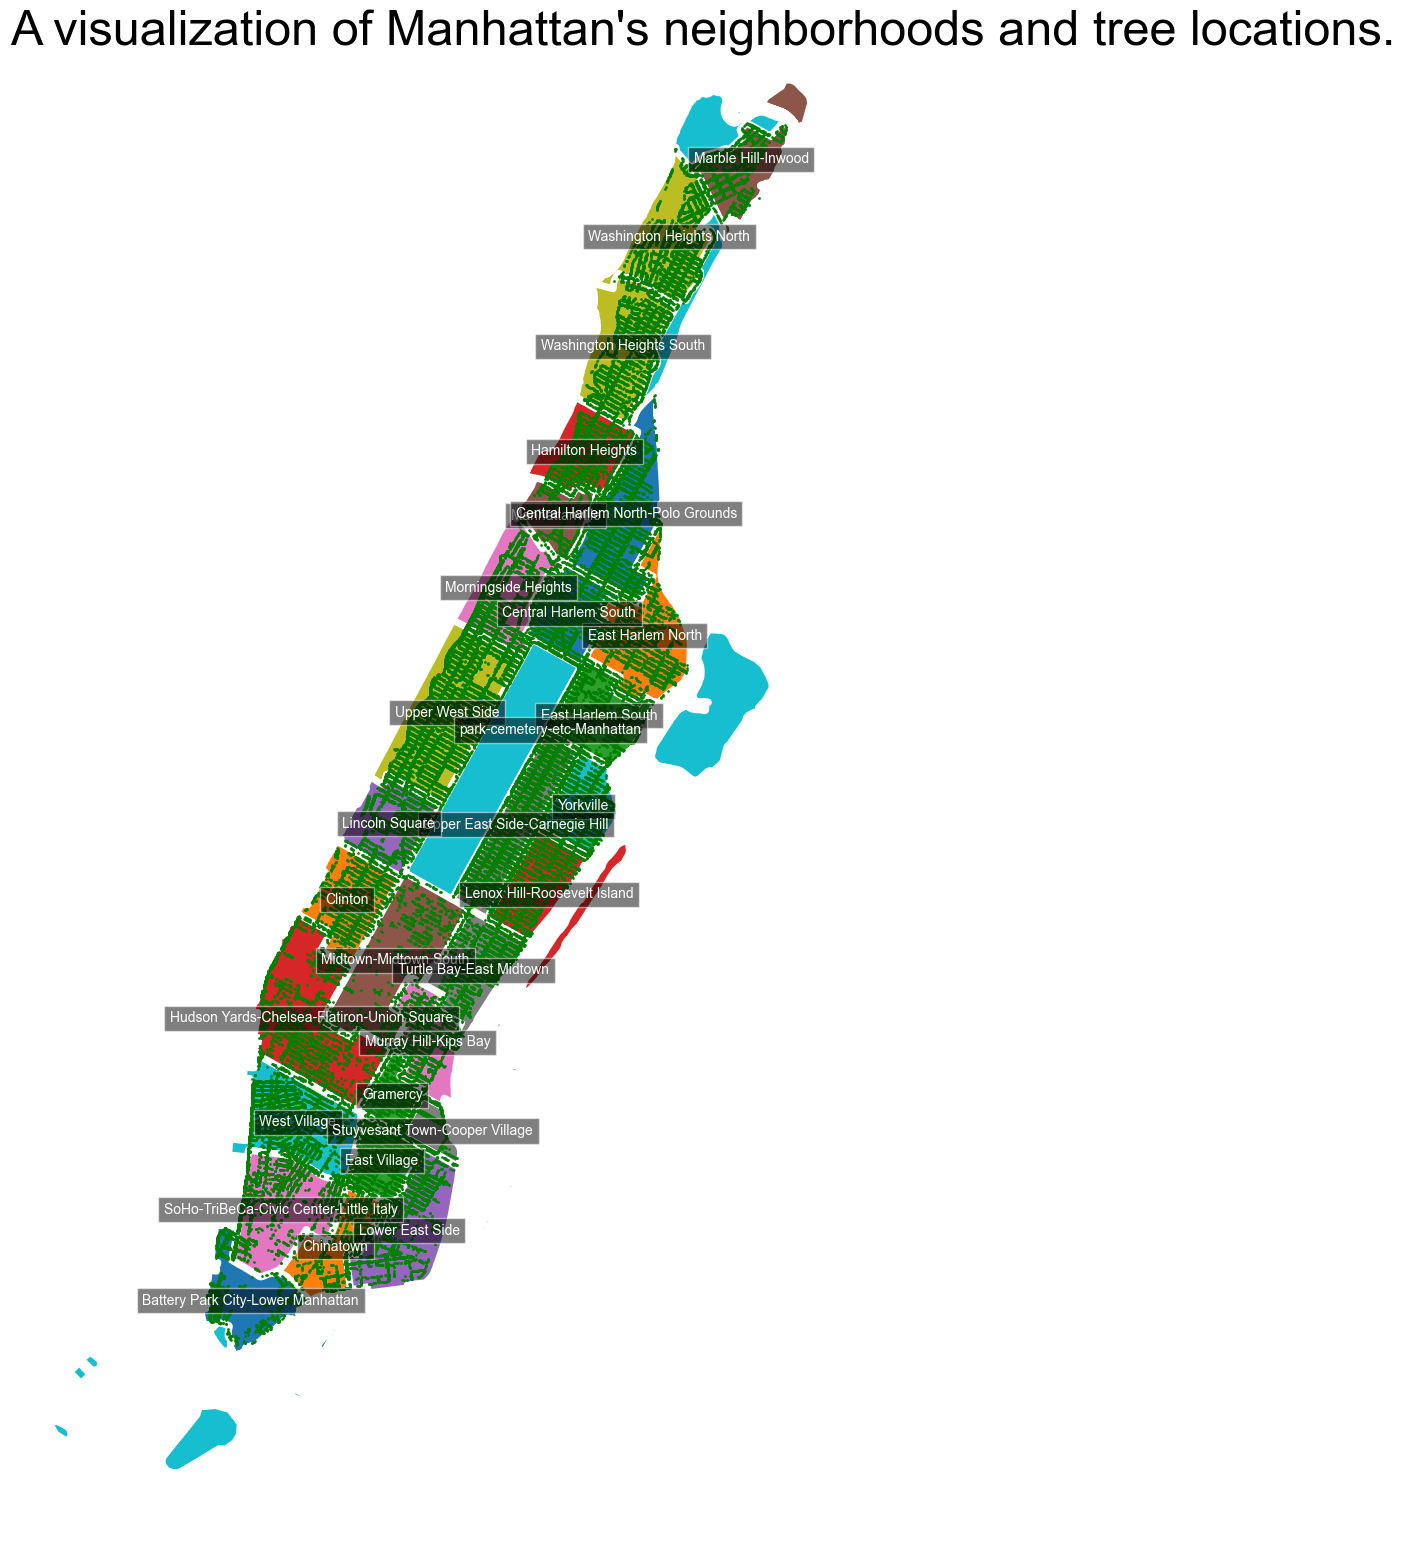

In [30]:

fig, ax = plt.subplots(figsize=(20, 20))
ax.set(facecolor = 'white')
ax.set_axis_off()

Manhattan.plot(ax=ax,column ='ntaname' ,edgecolor='white',linewidth=5);
gdf.geometry.plot(ax = ax, marker='o', color='green', markersize=.9);

for i, item in Manhattan.iterrows():
    x_centr,y_centr = item['geometry'].centroid.x,item['geometry'].centroid.y,
    items = item['ntaname']
    ax.text(x_centr, y_centr, items, fontsize=10, color='white', ha='center', va='center', bbox=dict(facecolor='black', alpha=0.5))
text = "A visualization of Manhattan's neighborhoods and tree locations."
ax.text(0, 1, text, fontsize=35, color='black',ha='left',va='top', transform=ax.transAxes)
plt.show()



# What ten tree species would you recommend the city plant in the future?

### It's time to start the last task. What 10 types of trees should I recommend for planting in the future? For recommendations, it was good to see Manhattan personally and walk through its surroundings, but unfortunately I had to settle for GOOGLE maps and a panorama of the city. Manhattan has a dense development and mostly trees grow on a piece of land in the middle of paving stones and are adjacent to high-rise buildings, so of course several factors need to be taken into account when making our recommendations:
- the place where the trees will be planted (in the panorama I saw how trees grow on verandas and roofs, how the roofs are covered with lawn). This is a very important criterion because Manhattan is also sharp, the wind is probably blowing along its outskirts and a more "aggressive" environment in winter. There are few open spaces for planting large trees in the central part, so those who will make a decision on our recommendations will need to take into account all the additional nuances.

According to our data, 128 different types of trees have been planted in the city, but we need to recommend only 10. Although 80% of all trees in Manhattan just fall on the 10 most popular species.

For recommendations, we need to select the criteria by which we will give them:
the status is not so informative for us since we do not have information about which species are dying.
We can take the following parameters for such a metric:
 - diameter of the tree trunk;
 - health status;
 - information about whether the trees have problems with the root or branches.

It makes no sense to consider all 128 species of trees, we will limit ourselves to only 25 species, since the remaining number of trees of each species does not exceed 200. This is a fairly small sample for analysis and recommendations. We don't have many columns with information about the state of these trees, so let's use what we have and try to choose 
## the best of what is available.

In [31]:
l = trees.groupby('spc_common').count().sort_values('tree_id',ascending=False).index[:25].to_list()
trees = trees[trees['spc_common'].isin(l)]
columns = ['tree_id', 'tree_dbh', 'spc_common', 'health','root_stone', 'root_grate','trnk_other', 'brch_other', 'nta_name']
tree = trees[columns]


In [32]:
good = tree[tree['health']=='Good']
fair = tree[tree['health']=='Fair']
poor = tree[tree['health']=='Poor']


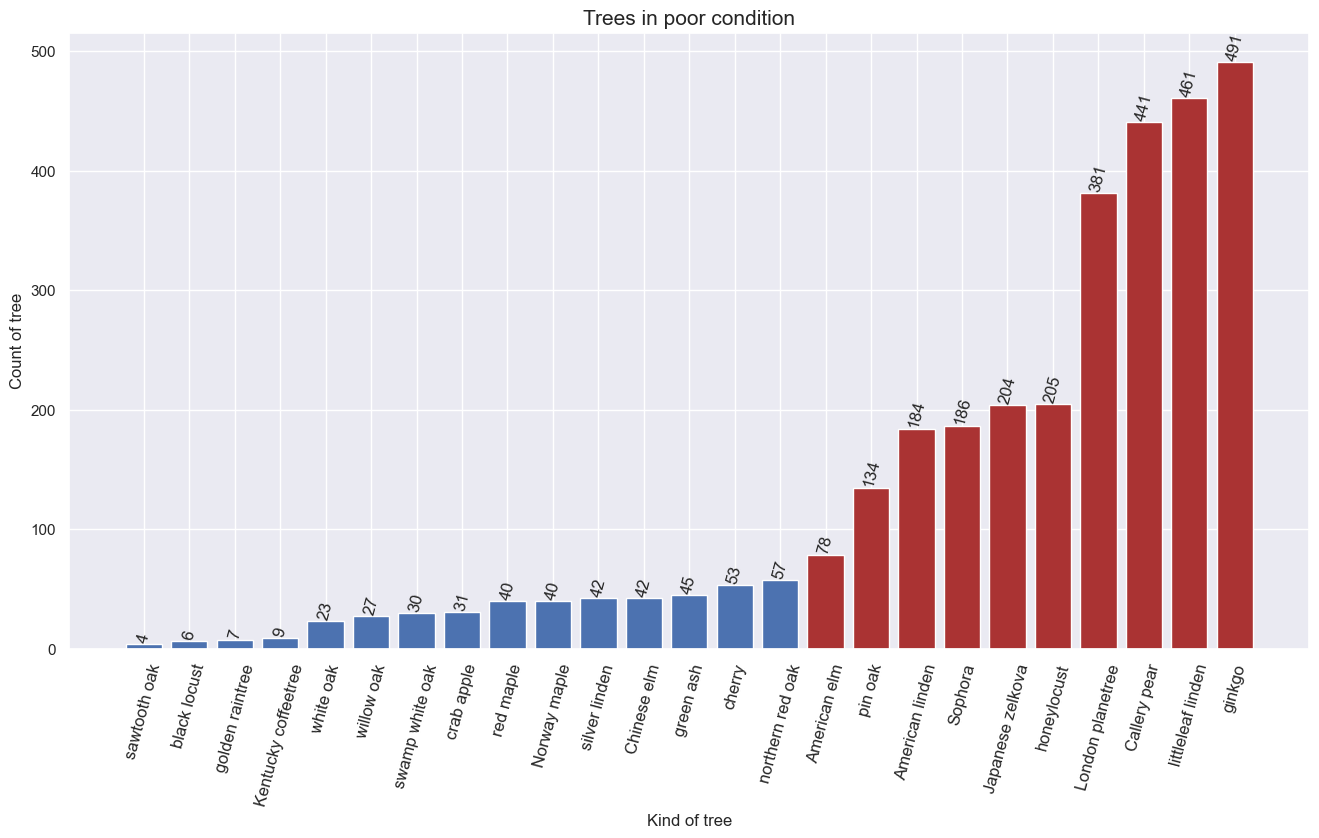

In [33]:
poor_val_count = poor.groupby('spc_common').count().reset_index()\
                     .rename(columns ={'tree_id':'count'})[['spc_common','count']]
poor_list = barplot_best_10(poor_val_count,'spc_common','count','Kind of tree','Count of tree',10,15,'Trees in poor condition')


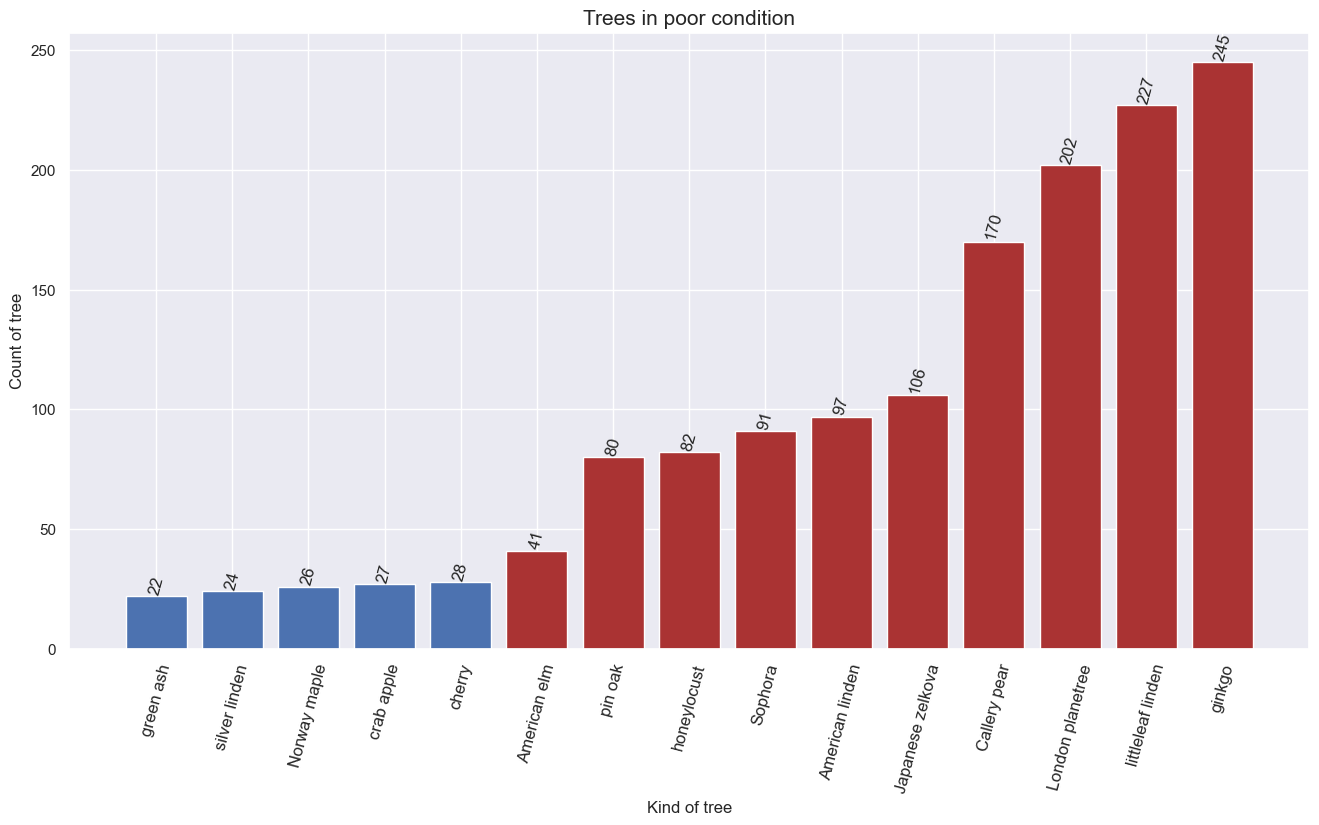

In [34]:

poor_grp = poor.groupby(['spc_common','root_stone','root_grate','trnk_other','brch_other']).count()['tree_id'].reset_index()\
               .rename(columns ={'tree_id':'count'} ).sort_values(['spc_common','count'],ascending = False)
poor_grp_ = poor_grp.query('root_stone =="No" & root_grate =="No"& trnk_other=="No"& brch_other=="No" ')[['spc_common','count']].sort_values('count',ascending = False)[:15]
poor_list_no = barplot_best_10(poor_grp_,'spc_common','count','Kind of tree','Count of tree',10,15,'Trees in poor condition')


Looking at the data on trees that have the "Poor" status, we can say that for all species, half of the trees do not have current problems with roots or branches. Although their general condition is unsatisfactory. Let's put 15 values from this data in a list and compare its contents after we get all three lists for the health of the trees.

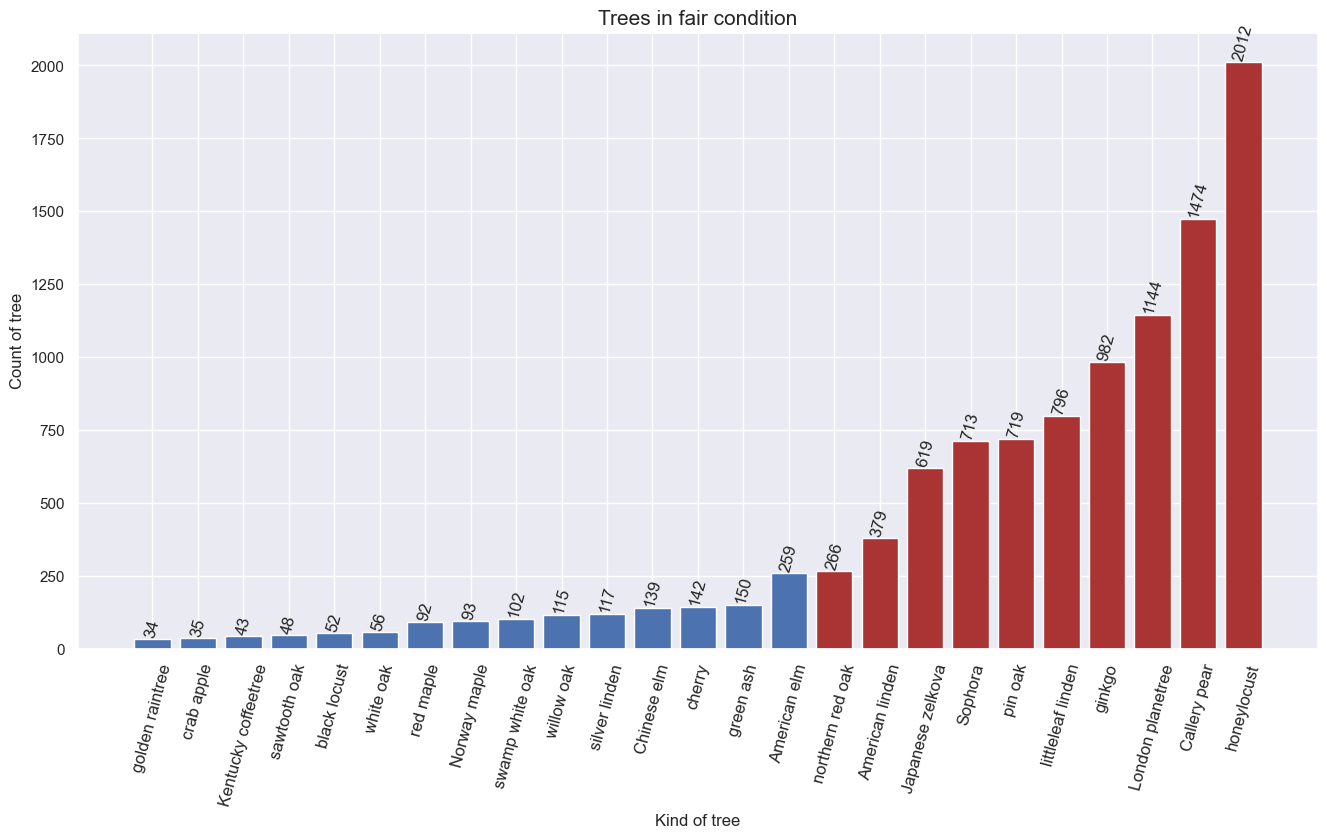

In [35]:
fair_val_count = fair.groupby('spc_common').count().reset_index()\
                     .rename(columns ={'tree_id':'count'})[['spc_common','count']]
fair_list = barplot_best_10(fair_val_count,'spc_common','count','Kind of tree','Count of tree',10,15,'Trees in fair condition')


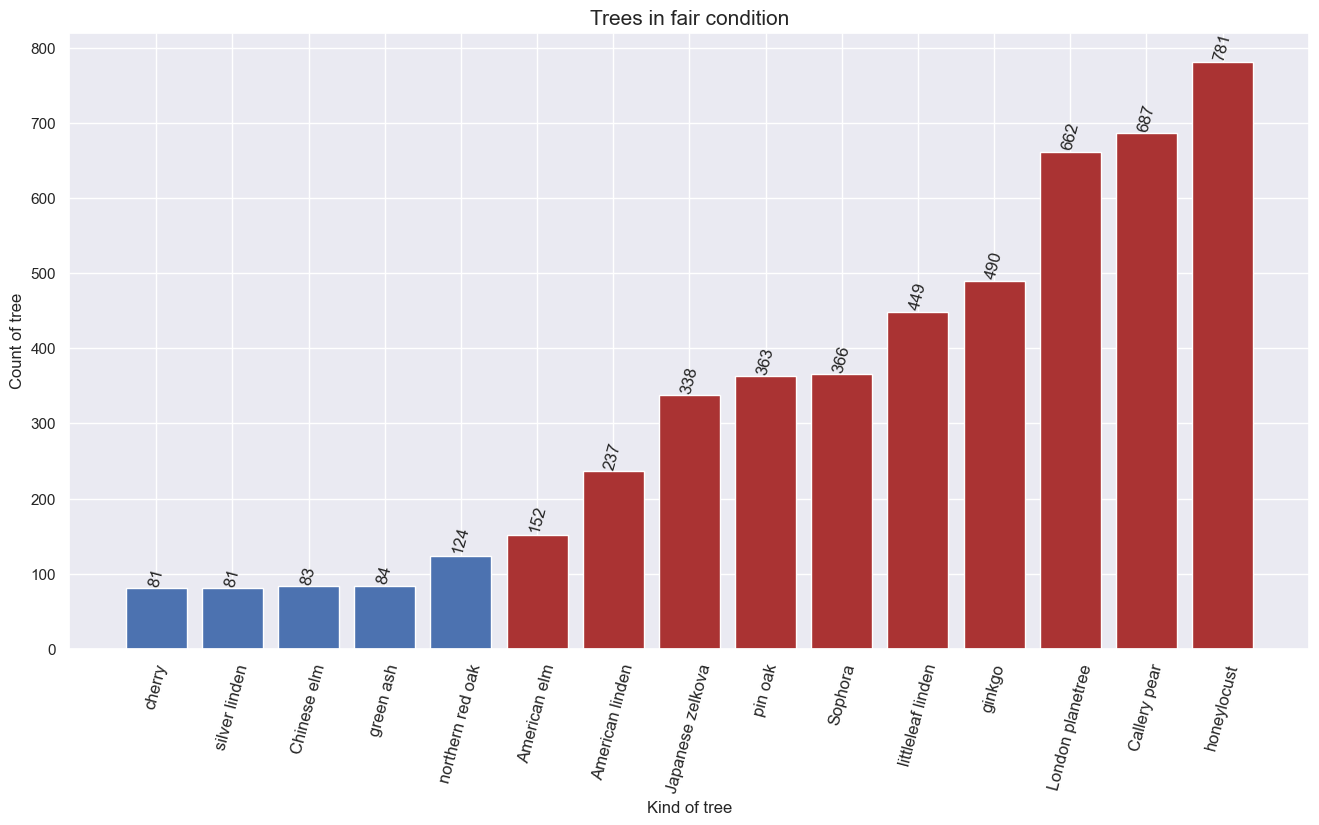

In [36]:
fair_grp = fair.groupby(['spc_common','root_stone','root_grate','trnk_other','brch_other']).count()['tree_id'].reset_index()\
               .rename(columns ={'tree_id':'count'} ).sort_values(['spc_common','count'],ascending = False)
fair_grp_ = fair_grp.query('root_stone =="No" & root_grate =="No"& trnk_other=="No"& brch_other=="No" ')[['spc_common','count']].sort_values('count',ascending = False)[:15]
fair_list_no = barplot_best_10(fair_grp_,'spc_common','count','Kind of tree','Count of tree',10,15,'Trees in fair condition')


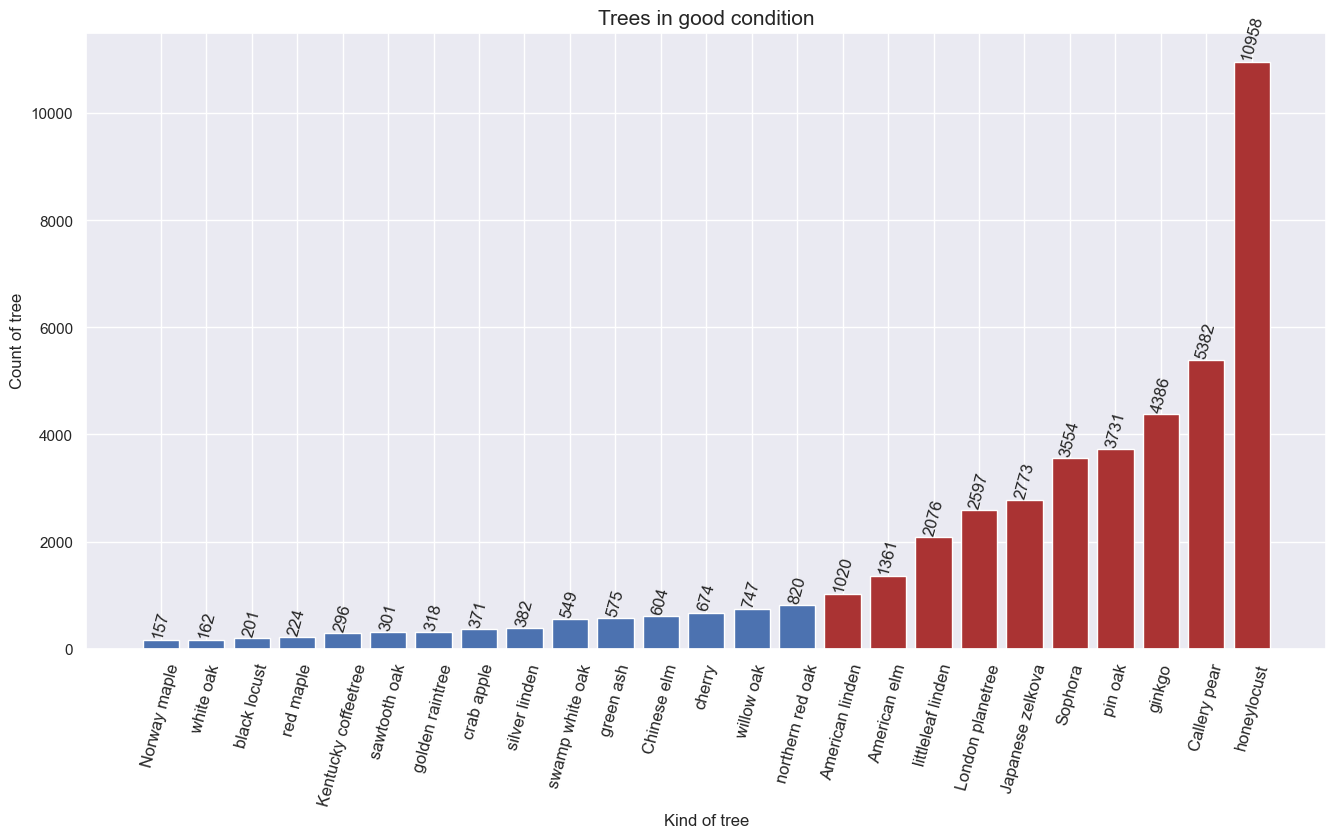

In [37]:
good_val_count = good.groupby('spc_common').count().reset_index()\
                     .rename(columns ={'tree_id':'count'})[['spc_common','count']]
good_list = barplot_best_10(good_val_count,'spc_common','count','Kind of tree','Count of tree',10,15,'Trees in good condition')

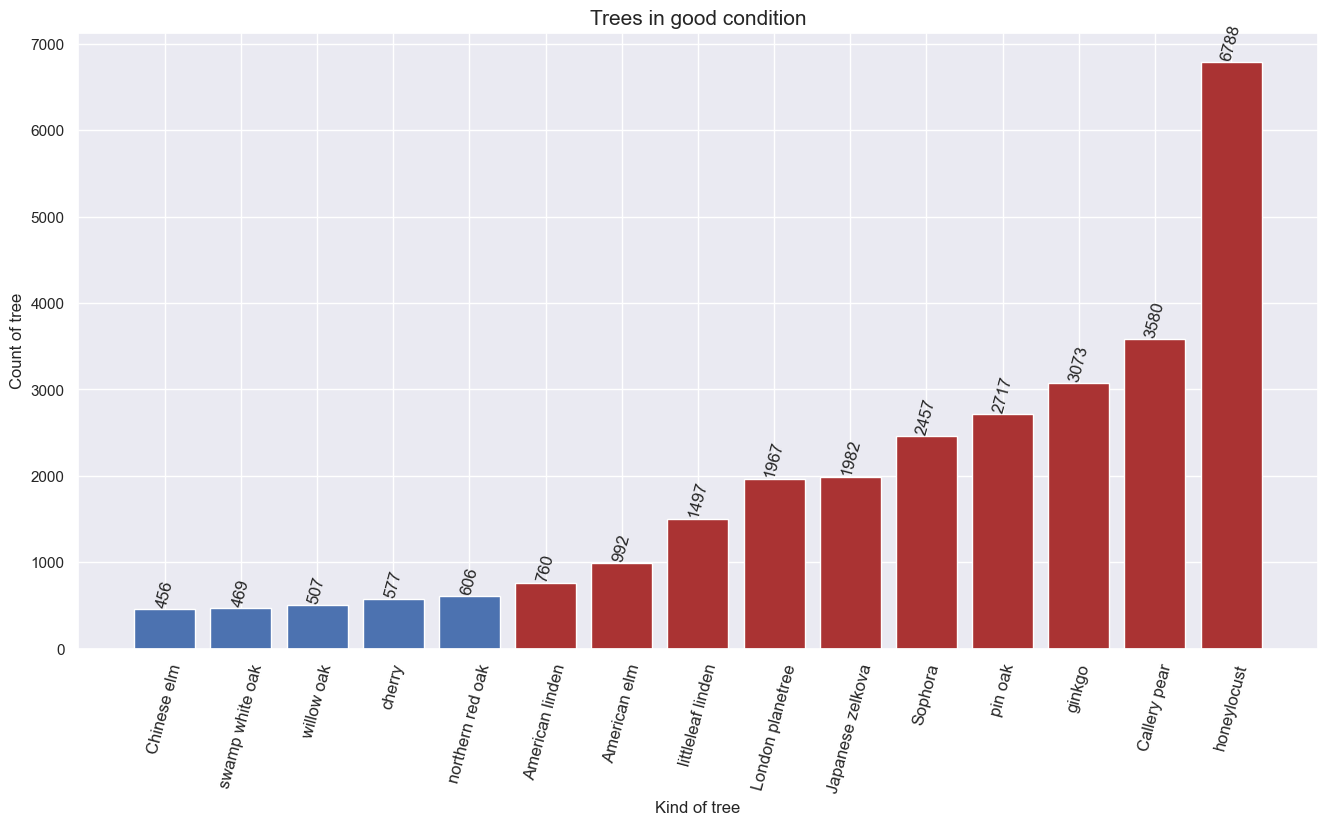

In [38]:
good_grp = good.groupby(['spc_common','root_stone','root_grate','trnk_other','brch_other']).count()['tree_id'].reset_index()\
               .rename(columns ={'tree_id':'count'} ).sort_values(['spc_common','count'],ascending = False)
good_grp_ = good_grp.query('root_stone =="No" & root_grate =="No"& trnk_other=="No"& brch_other=="No" ')[['spc_common','count']].sort_values('count',ascending = False)[:15]
good_list_no = barplot_best_10(good_grp_,'spc_common','count','Kind of tree','Count of tree',10,15,'Trees in good condition')




Acting as "light" growing cities around the world, here are the reasons why trees in the urban landscape are so important:

Trees make cities more attractive.
By adding color to gray spaces and separating various elements of urban infrastructure from each other, they turn busy cities into a more harmonious and pleasant environment.

Trees improve the air quality in cities.
Fortunately, trees can minimize air toxicity by pulling out carbon dioxide.

A single adult tree can absorb up to 48 pounds of carbon dioxide, while trees in close proximity to the street absorb 9 times more pollutants than trees planted far apart. Studies show that the ozone content improves by 3-7% every time the crown of urban trees increases by 10%.

Trees create a cooling effect.
Concrete streets, parking lots and paved buildings can increase the city temperature by about 3-7 degrees. It is known that trees, by evaporating water and creating shade, reduce this heat and create a cooling effect on local temperatures. With the proper planting of city streets, the average household in the city can also save from 15% to 35% of their electricity bills.

Trees benefit the health of citizens.
With the ability to protect people from pollution and harsh weather, trees help those who suffer from asthma, skin cancer, hypertension and other stress-related diseases.

Each adult tree can reduce unwanted noise to 6 decibels, and the vertical wall of trees serves as a buffer for loud street sounds.


## Trees allow cities to save money.
A study conducted in the UK by Natural England showed that every pound spent on tree planting yields savings of 7 pounds, which is more than 2.1 billion pounds when taken into account at the national level.

This is due to the fact that throughout their life trees bring tangible benefits, twice the amount invested in their planting and care for them. Such benefits can range from climate change mitigation, ecosystem conservation, disaster prevention, improved livelihoods and sustainable infrastructures.

By creating a more pleasant and safe environment, the surrounding trees increase the value of real estate by an average of 5-20%. According to professional realtors, street trees also add more value to neighboring homes and businesses than non-personal trees.

Trees allow cities to better manage their storm drains.
A huge part of the earth's surface of our cities consists of impermeable materials that cannot effectively absorb water and mitigate floods.

However, every adult and healthy tree is able to absorb up to 450 liters of water with its roots. In addition, trees effectively prevent stormwater (which may contain harmful chemicals) from entering reservoirs.

### It's time to analyze all three lists and try to recommend 10 types of trees for planting in Manhattan

In [39]:
df = pd.DataFrame(good_list_no,columns =['good_kind_trees'])
df['fair_kind_trees'] = list(reversed(fair_list_no))  
df['poor_kind_trees'] = list(reversed(poor_list_no))  
df.sort_index(ascending= False,inplace= True)


### We have received a dataframe with intersecting tree species, now we have to select 10 species from them for planting in Manhattan in the future

On one of the sites on recommendations for planting trees in the city, I came across a diagram that describes the advantages of a particular type of tree.

In [40]:
#img_01 = Image.open("Tree_selection_2.jpeg")
#img_02 = Image.open("Tree_selection_1.jpeg")
#img_01_size = img_01.size
#img_02_size = img_02.size
#new_im = Image.new('RGB', (2*img_01_size[0],img_02_size[1]), (250,250,250))
#new_im.paste(img_01, (0,0))
#new_im.paste(img_02, (img_01_size[0],0))
#new_im.save("Tree_selection.png", "PNG")

![my Image caption](Tree_selection.png)

In [41]:
df.head(15)

good_kind_trees    fair_kind_trees    poor_kind_trees
14        honeylocust             cherry          green ash
13       Callery pear      silver linden      silver linden
12             ginkgo        Chinese elm       Norway maple
11            pin oak          green ash         crab apple
10            Sophora   northern red oak             cherry
9    Japanese zelkova       American elm       American elm
8    London planetree    American linden            pin oak
7   littleleaf linden   Japanese zelkova        honeylocust
6        American elm            pin oak            Sophora
5     American linden            Sophora    American linden
4    northern red oak  littleleaf linden   Japanese zelkova
3              cherry             ginkgo       Callery pear
2          willow oak   London planetree   London planetree
1     swamp white oak       Callery pear  littleleaf linden
0         Chinese elm        honeylocust             ginkgo

# Based on the latest dataframe and work on tree breeding, I would recommend the following species:

Ginkgo, Honey locust, Pin oak, American linden, Chinese elm - These species have the biggest advantage as they grow fast enough

Ginkgo, Honey locust, Kentucky coffee tree - Resistant to Disease or Insect	

Ginkgo, Hawthorns, London plane, English oak, American elm - Resistant to Smoke and Soot

Сherry ,Green ash - These species have the least health problems     


# Let's write down our final list with recommended tree species:
### 1. Honey locust
### 2. Ginkgo
### 3. Pin oak
### 4. American linden
### 5. Chinese elm
### 6. London plane
### 7. English oak
### 8. American elm
### 9. Kentucky coffee tree
### 10. Green ash

11. Сherry
12. Hawthorns


## Thank you for your interest in my work

## 💪 Challenge
Create a report that covers the following:
* What are the most common tree species in Manhattan?
* Which are the neighborhoods with the most trees?
* A visualization of Manhattan's neighborhoods and tree locations.
* What ten tree species would you recommend the city plant in the future?